In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

See section 2 on http://cs229.stanford.edu/section/cs229-gaussian_processes.pdf

## Create some data

In [2]:
n = 100
sigma = 1.5
w = np.r_[0.5, 1.21]
X = np.random.random(n)*5
X = np.vstack((np.ones(n), X)).T 
y = X.dot(w) + np.random.normal(size=n, scale=sigma)

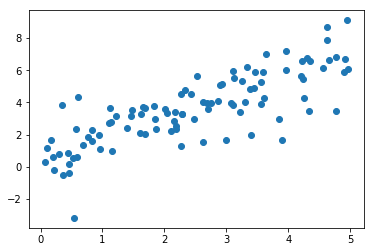

In [3]:
plt.scatter(X[:,1], y)

## Posterior distributions for parameters

In [4]:
tau = 10. # stdev of zero-mean Gaussian prior on parameters

A = 1./sigma**2 * X.T.dot(X) + 1/tau**2 * np.eye(X.shape[1])

w_posterior_mean  = 1./sigma**2 * np.linalg.pinv(A).dot(X.T).dot(y) 
w_posterior_sigma = np.linalg.pinv(A) 

print w_posterior_mean
print w_posterior_sigma

[0.62214652 1.21736412]
[[ 0.08814515 -0.0268897 ]
 [-0.0268897   0.01101376]]


plot posterior distrbution for parameters

In [5]:
t1 = np.linspace(w_posterior_mean[0]-.05, w_posterior_mean[0]+.05, 50)
t2 = np.linspace(w_posterior_mean[1]-.05, w_posterior_mean[1]+.05, 50)

z = np.zeros((len(t1), len(t2)))
for i in range(len(t1)):
    for j in range(len(t2)):
        z[i,j] = stats.multivariate_normal(w_posterior_mean, w_posterior_sigma).pdf([t1[i], t2[j]])

Text(0,0.5,'$w_1$')

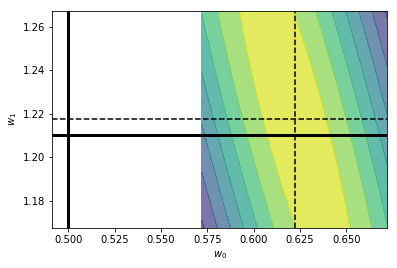

In [6]:
T1, T2 = np.meshgrid(t1, t2)
plt.contourf(t1, t2, z, alpha=.7)
plt.axhline(w_posterior_mean[1], color="black", ls="--")
plt.axvline(w_posterior_mean[0], color="black", ls="--")
plt.axvline(w[0], color="black", lw=3)
plt.axhline(w[1], color="black", lw=3)
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")

## Predictive distributions

In [7]:
X_new = np.linspace(np.min(X[:,1]), np.max(X[:,1]),10)
X_new = np.vstack((np.ones(len(X_new)), X_new)).T

y_predict_means  = []
y_predict_sigmas = []
for x_new in X_new:
    y_predict_means.append(1./sigma**2*x_new.T.dot(np.linalg.pinv(A)).dot(X.T).dot(y))
    y_predict_sigmas.append(x_new.T.dot(np.linalg.pinv(A)).dot(x_new)+sigma**2)

y_predict_means = np.r_[y_predict_means]
y_predict_sigmas = np.r_[y_predict_sigmas]

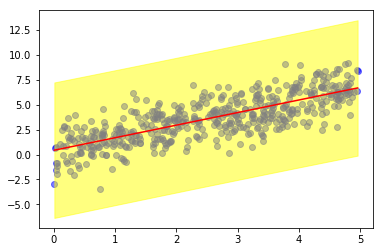

In [8]:
plt.scatter(X[:,1], y, alpha=.5, color="blue")
plt.plot(X_new[:,1], y_predict_means, color="red")
plt.fill_between(X_new[:,1], y_predict_means-3*y_predict_sigmas, y_predict_means+3*y_predict_sigmas, 
                 color="yellow", alpha=.5)

observe how the std of predictive distributions is lowest at center of data

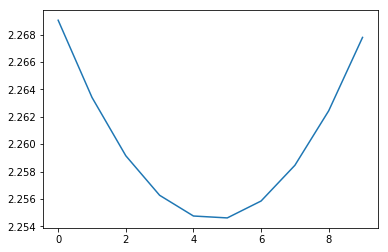

In [9]:
plt.plot(y_predict_sigmas)